# CHAPTER21 CNN을 이용한 이미지 인식 기초

## 21.1 딥러닝 이미지 인식

- CNN, 합성곱 신경망으로 불리는 심층 신경망을 이용해 이미지 인식을 해볼 것이다


## 21.2 CNN

### 21.2.1 CNN의 개요

- CNN은 인간 뇌의 시각 피질과 유사한 구조를 가진 합성곱층을 사용해 특징을 추출하는 신경망
- CNN은 대부분 합성곱층과 함께 풀링층이 사용된다
- 합성곱층은 완전연결층과 달리 2차원의 특징을 추출하는데 뛰어나다

### 21.2.2 합성곱층

- CNN은 층을 거칠수록 입력층에선 저차원적인 개념 특징에 주목하고 출력층이 가까울수록 고차원적인 개념 특징에 주목한다
- 내부에 필터, 커널로 불리는 가중치 행렬이 존재한다
- 여기선 합성곱층, 풀링층에서 어떤 처리가 이뤄지는지 보기위해 넘파이에서 구현된 코드를 사용한다

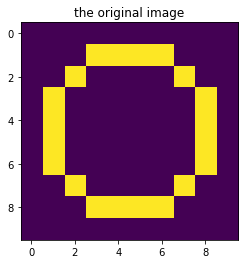

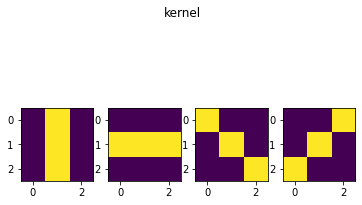

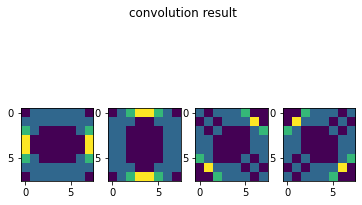

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request

class Conv: # 3x3, no padding, strides
    def __init__(self, w):
        self.w = w
    def f_prop(self,x):
        out = np.zeros((x.shape[0]-2, x.shape[1]-2)) # out.shape = (8.8)
        # print(out.shape)
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                X = x[i:i+3, j:j+3] # 입력받은 이미지 x에서 3x3 씩 꺼내옴 / i,j는 0부터 시작 => 3x3이 겹치면서 지나감
                # print(X.shape) # X.shape = (3,3) 
                # print(self.w.flatten().shape)
                # print(X.flatten().shape)
                out[i,j] = np.dot(self.w.flatten(), X.flatten()) # 입력받은 w와 x를 일차원 벡터로 만들고 행렬곱 (9,) x (9,)
        return out





local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename) # X.shape = (10,10)

plt.imshow(X) 
plt.title('the original image', fontsize=12)
plt.show()

w1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])

w2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
w3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
w4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

plt.subplot(1,4,1); plt.imshow(w1)
plt.subplot(1,4,2); plt.imshow(w2)
plt.subplot(1,4,3); plt.imshow(w3)
plt.subplot(1,4,4); plt.imshow(w4)
plt.suptitle('kernel', fontsize=12)
plt.show()

conv1 = Conv(w1) ; c1 = conv1.f_prop(X)
conv2 = Conv(w2) ; c2 = conv2.f_prop(X)
conv3 = Conv(w3) ; c3 = conv3.f_prop(X)
conv4 = Conv(w4) ; c4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(c1)
plt.subplot(1,4,2); plt.imshow(c2)
plt.subplot(1,4,3); plt.imshow(c3)
plt.subplot(1,4,4); plt.imshow(c4)
plt.suptitle('convolution result', fontsize=12)
plt.show()

### 21.2.3 풀링층

- 합성곱층의 출력을 축약하고 데이터양을 줄이는 층
- 피쳐맵의 부분 구간의 최댓값, 평균을 구해서 데이터 압축을 한다
- 합성곱은 이미지 내의 특징량의 분포를 확인할수 있는데 같은 특징이 유사한 위치에 뭉쳐 분포하는 경우가 많고 특징이 없는 장소가 넓게 분포하는 경우도 있어서 합성곱층에서 출력되는 피쳐맵은 데이터 낭비가 많다
- 풀링은 데이터 낭비를 줄이고 정보 손실을 최소화하면서 데이터를 압축할 수 있다

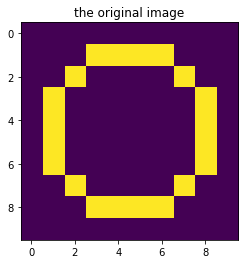

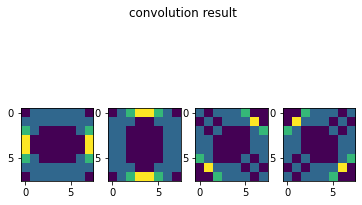

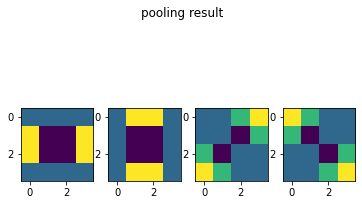

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request

class Conv: # 3x3, no padding, strides
    def __init__(self, w):
        self.w = w
    def f_prop(self,x):
        out = np.zeros((x.shape[0]-2, x.shape[1]-2)) # (8.8)
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                X = x[i:i+3, j:j+3] # 입력받은 이미지 x에서 3x3 씩 꺼내옴
                out[i,j] = np.dot(self.w.flatten(), X.flatten()) # 입력받은 w와 x를 일차원 벡터로 만들고 행렬곱
        return out


class pool:
    def __init__(self,l):
        self.l = l
    def f_prop(self,x):
        l = self.l
        out = np.zeros((x.shape[0]//self.l, x.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(x[i*l:(i+1)*l, j*l:(j+1)*l] ) # 범위 내에서 max값 하나 구해서 out에 할당
        
        return out


local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename) # X.shape = (10,10)

plt.imshow(X) 
plt.title('the original image', fontsize=12)
plt.show()

w1 = np.array([[0,1,0],
               [0,1,0],
               [0,1,0]])

w2 = np.array([[0,0,0],
               [1,1,1],
               [0,0,0]])
w3 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])
w4 = np.array([[0,0,1],
               [0,1,0],
               [1,0,0]])

conv1 = Conv(w1) ; c1 = conv1.f_prop(X)
conv2 = Conv(w2) ; c2 = conv2.f_prop(X)
conv3 = Conv(w3) ; c3 = conv3.f_prop(X)
conv4 = Conv(w4) ; c4 = conv4.f_prop(X)

plt.subplot(1,4,1); plt.imshow(c1)
plt.subplot(1,4,2); plt.imshow(c2)
plt.subplot(1,4,3); plt.imshow(c3)
plt.subplot(1,4,4); plt.imshow(c4)
plt.suptitle('convolution result', fontsize=12)
plt.show()

pool = pool(2)
p1 = pool.f_prop(c1)
p2 = pool.f_prop(c2)
p3 = pool.f_prop(c3)
p4 = pool.f_prop(c4)

plt.subplot(1,4,1); plt.imshow(p1)
plt.subplot(1,4,2); plt.imshow(p2)
plt.subplot(1,4,3); plt.imshow(p3)
plt.subplot(1,4,4); plt.imshow(p4)
plt.suptitle('pooling result', fontsize=12)
plt.show()

### 21.2.4 CNN 구현

- keras, Tensorflow를 이용해 CNN을 구현한다


In [19]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten


model = Sequential()
model.add(Conv2D(32,2,padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(2, strides=1))
model.add(Conv2D(32,2,padding='same'))
model.add(MaxPooling2D(2, strides=1))

model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 32)        4128      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 256)              

### 21.2.5 CNN을 이용한 분류(MNIST)

- 28x28 크기의 흑백 이미지
- 0~9 10개의 클래스 라벨

4/4 [==============================] - 0s 27ms/step - loss: 11.0666 - accuracy: 0.0900
Test loss :  11.06661605834961
Test accuracy :  0.09000000357627869


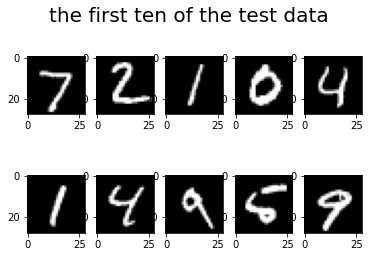

1/1 [==============================] - 0s 91ms/step
[8 8 6 0 3 0 5 0 5 6]


In [27]:
from tensorflow import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy
from keras import optimizers, losses

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:300].reshape(-1,28,28,1)
X_test = X_test[:100].reshape(-1,28,28,1)
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

model = Sequential()
model.add(layers.Conv2D(32,3,input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Adadelta()
loss = keras.losses.categorical_crossentropy

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=1, verbose=1, validation_data=(X_test, y_test))

loss, acc = model.evaluate(X_test, y_test)
print('Test loss : ', loss)
print('Test accuracy : ', acc)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape((28,28)), 'gray')
plt.suptitle('the first ten of the test data', fontsize=20)
plt.show()

pred = np.argmax(model.predict(X_test[:10]), axis=1)
print(pred)

### 21.2.6 CNN을 이용한 분류(Cifar10)

- 10종류의 개체가 있는 이미지 데이터셋

    0. 비행기

    1. 자동차

    2. 새

    3. 고양이

    4. 사슴

    5. 개

    6. 개구리

    7. 말

    8. 선박

    9. 트럭



4/4 [==============================] - 0s 35ms/step - loss: 5.7427 - accuracy: 0.1900
Test loss :  5.742739677429199
Test accuracy :  0.1899999976158142


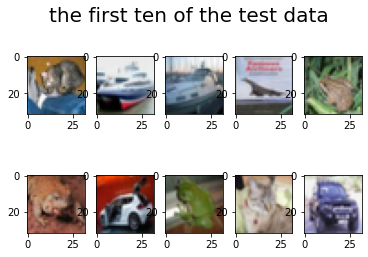

1/1 [==============================] - 0s 103ms/step
[8 8 8 9 4 8 6 7 6 9]


In [33]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:300]
X_test = X_test[:100]
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

model = Sequential()
model.add(layers.Conv2D(32,3,padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32,3,activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.25))

######################## 코드 작성 ###########################
model.add(layers.Conv2D(64,3,padding='same',activation='relu'))
model.add(layers.Conv2D(64,3,activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Dropout(0.25))
######################## 코드 작성 ###########################

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=1)

model.save_weights('param_cifar10.hdf5')

loss, acc = model.evaluate(X_test, y_test)
print('Test loss : ', loss)
print('Test accuracy : ', acc)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
plt.suptitle('the first ten of the test data', fontsize=20)
plt.show()

pred = np.argmax(model.predict(X_test[:10]), axis=1)
print(pred)

## 21.3 하이퍼 파라미터

### 21.3.1 filters(합성곱층)

- 합성곱층의 filters 파라미터는 피쳐맵의 수, 추출할 특징의 종류를 지정한다
- filters가 너무 작으면 필요한 특징을 추출하지 못해 학습이 잘 안되고 너무 크면 과적합을 일으킨다

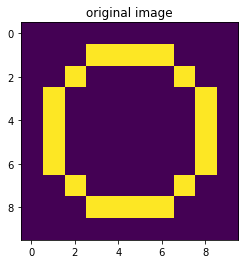

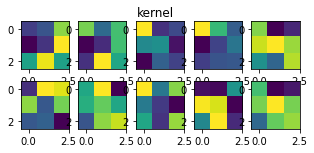

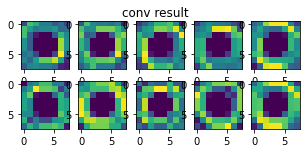

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request

class Conv: # 3x3, no padding, strides
    def __init__(self, filters):
        self.filters = filters
        self.W = np.random.rand(filters,3,3)
    def f_prop(self,X):
        out = np.zeros((filters, X.shape[0]-2, X.shape[1]-2)) #
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+3, j:j+3]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out
    


local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename) # X.shape = (10,10)

filters=10

conv = Conv(filters=filters)

C = conv.f_prop(X)

plt.imshow(X)
plt.title('original image', fontsize=12)
plt.show()


plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()


plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C[i])
plt.suptitle('conv result', fontsize=12)
plt.show()

### 21.3.2 kernel_size(합성곱층)

- 커널의 크기
- 커널의 사이즈가 너무 작으면 극히 작은 특징도 검출할 수 없어서 제대로 학습을 할 수 없다
- 너무 크면 원래 작은 특징의 모임으로 검출될 예정이던 큰 특징까지 검출되어 계층 구조 파악에 자신있는 신경망 모델의 강점을 살리지 못하고 비효율적인 모델이 된다

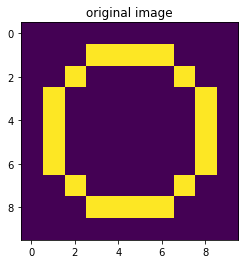

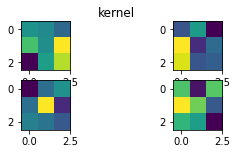

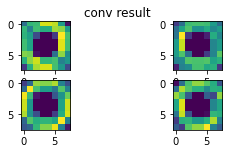

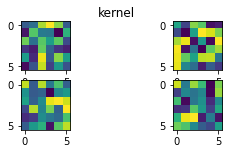

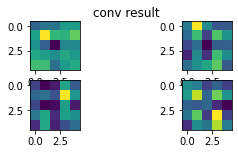

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request

class Conv: # 3x3, no padding, strides
    def __init__(self, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = np.random.rand(filters,kernel_size[0], kernel_size[1])
    def f_prop(self,X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1)) 

        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out
    


local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename) # X.shape = (10,10)

filters=4
kernel_size = (3,3)
conv1 = Conv(filters=filters, kernel_size=kernel_size)
C1 = conv1.f_prop(X)

filters=4
kernel_size = (6,6)
conv2 = Conv(filters=filters, kernel_size=kernel_size)
C2 = conv2.f_prop(X)

plt.imshow(X)
plt.title('original image', fontsize=12)
plt.show()


plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv1.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()


plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C1[i])
plt.suptitle('conv result', fontsize=12)
plt.show()


plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv2.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()


plt.figure(figsize=(5,2))
for i in range(filters):
    plt.subplot(2,filters/2, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C2[i])
plt.suptitle('conv result', fontsize=12)
plt.show()

### 21.3.3 Strides (합성곱층)

- 커널을 이동하는 거리 지정
- 스트라이드가 작을수록 세부적인 특징량을 추출할 수 있지만 이미지 내의 동일한 위치에 같은 특징을 여러번 감지해버리는 등 불필요한 계산이 많아질 수 있다
- 보통 스트라이드가 작은편이 좋다고 여겨져 Conv2D의 기본값은 (1,1)

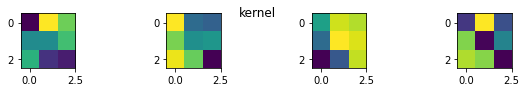

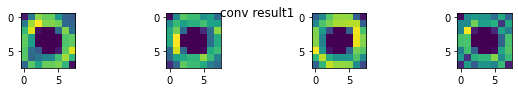

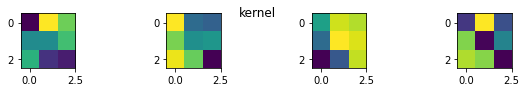

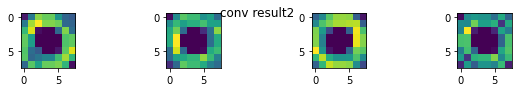

In [43]:
class Conv:
    def __init__(self, filters, kernel_size, strides):
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])
    def f_prop(self,X):
        k_h = self.kernel_size[0]
        k_w = self.kernel_size[1]
        s_h = self.strides[0]
        s_w = self.strides[1]
        out = np.zeros((filters, (X.shape[0] - k_h) // s_h+1, (X.shape[1] - k_w)//s_w+1))

        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename) # X.shape = (10,10)

filters = 4
kernel_size = (3,3)
strides = (1,1)

conv1 = Conv(filters=filters, kernel_size=kernel_size, strides=strides)
C1 = conv1.f_prop(X)

filters = 4
kernel_size = (3,3)
strieds = (2,2)

conv2 = Conv(filters=filters, kernel_size=kernel_size, strides=strides)
conv2.W = conv1.W

C2 = conv2.f_prop(X)



plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv1.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()


plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C1[i])
plt.suptitle('conv result1', fontsize=12)
plt.show()


plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv2.W[i])
plt.suptitle('kernel', fontsize=12)
plt.show()


plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C2[i])
plt.suptitle('conv result2', fontsize=12)
plt.show()

### 21.3.4 padding (합성곱층)

- 입력 이미지의 주변을 0으로 채우는 것
- 패딩에 의해 가장자리 데이터의 특징도 잘 고려된다
- 데이터 갱신 빈도가 올라가고, 각층의 입출력 유닛 수를 주졸할 수 있는 장점이 있다

In [50]:
model = Sequential([
    layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=[32,32,3]),
    layers.MaxPooling2D(3),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2)

])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


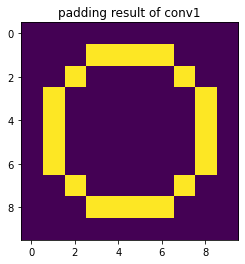

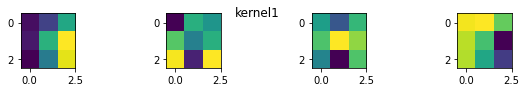

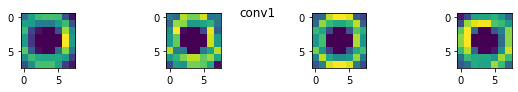

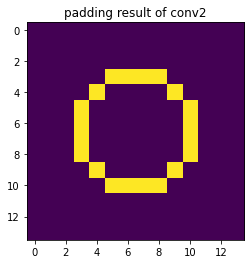

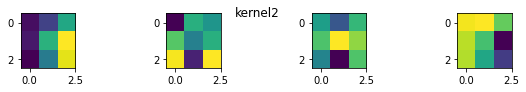

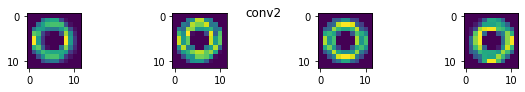

In [54]:
class Conv:
    def __init__(self, filters, kernel_size, strides, padding):
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = strides
        self.padding = padding
        self.W = np.random.rand(filters, kernel_size[0], kernel_size[1])

    def f_prop(self,X): # (n,n) 이런 형태로 입력되어 각각 높이, 너비에 할당한다
        k_h, k_w = self.kernel_size
        s_h, s_w = self.strides
        p_h, p_w = self.padding # X.shape[0], X.shape[1]은 입력 이미지의 높이, 너비.
        out = np.zeros((filters, (X.shape[0] + p_h * 2 - k_h) // s_h +1, # 여기서 미리 결과값의 사이즈를 계산해두고 아래서 채우는 형태
                                 (X.shape[1] + p_w * 2 - k_w) // s_w +1)) 
        # 들어온 이미지의 높이에 위아래로 패딩을 더해준다. 그래서 2를 곱해주는 것이고 커널 사이즈만큼 빼주고 +1. 
        # 모델 만들어서 찍어보니 이미지 shape에서 커널 사이즈 빼고 +1 해주면 딱 맞음
        # 풀링도 풀링 사이즈로 나누면 맞음. 딱 맞는거 아니면 나누고 나머지 버리는 형태로
        # Conv2D에서는 커널 사이즈가 2든 3이든 padding='same' 넣어주면 알아서 맞추는데 여기선 다 넣어주니까 
        # 커널사이즈에 따라 패딩 사이즈도 맞춰서 넣어야 할것으로 보인다
        X = np.pad(X, ((p_h, p_h), (p_w, p_w)), 'constant', constant_values=((0,0), (0,0)))
        self.X = X

        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i*s_h : i*s_h + k_h, j*s_w : j*s_w + k_w] # i는 0부터 시작. 스트라이드가 곱해져서 간격을 잡아주고 시작점에서 커널 사이즈를 더해줘서
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten()) # 커널의 범위내에 있는 값들을 가져온다.
                    # 커널 사이즈만큼 ex) 3x3 가져온 픽셀값들을 일차원 벡터로 만들고 가중치랑 곱해서 나온 값을 저장한다
                    
        return out 

   
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename) # X.shape = (10,10)     

filters = 4
kernel_size = (3,3)
strides = (1,1)
padding = (0,0)

conv1 = Conv(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
C1 = conv1.f_prop(X)

filters = 4
kernel_size = (3,3)
strides = (1,1)
padding = (2,2)

conv2 = Conv(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)
conv2.W = conv1.W

C2 = conv2.f_prop(X)


plt.imshow(conv1.X)
plt.title('padding result of conv1', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv1.W[i])
plt.suptitle('kernel1', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C1[i])
plt.suptitle('conv1', fontsize=12)
plt.show()

plt.imshow(conv2.X)
plt.title('padding result of conv2', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(conv2.W[i])
plt.suptitle('kernel2', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1,filters, i+1)
    ax = plt.gca()
    ax.tick_params(labelbottom='off', labelleft='off', bottom='off', left='off')
    plt.imshow(C2[i])
plt.suptitle('conv2', fontsize=12)
plt.show()

### 21.3.5 pool_size(풀링층)

- 풀링의 거칠기를 지정하는 파라미터
- pool_size를 크게 하면 위치에 대한 강건성이 상승하나 기본적으로 2x2로 사용시 좋다고 알려져 있다

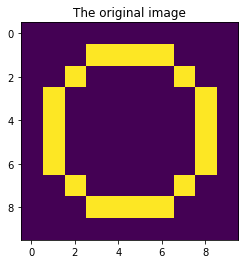

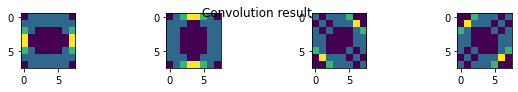

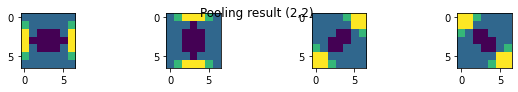

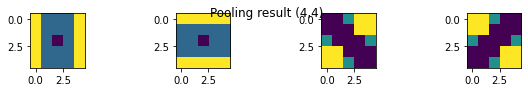

In [55]:
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   # kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out


#-- pool  max.
class Pool:
    def __init__(self, pool_size):
        self.pool_size = pool_size
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        out = np.zeros((X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i:i+k_h, j:j+k_w])
        return out

#
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X) # 피쳐맵 

# 풀링 1 - (2,2)
pool_size = (2,2)
pool1 = Pool(pool_size)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2 - (4,4)
pool_size = (4,4)
pool2 = Pool(pool_size)
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]

# --------------------------------------------------------------
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result (2,2)', fontsize=12)
plt.show()
#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result (4,4)', fontsize=12)
plt.show()

### 21.3.6 strides (풀링층)



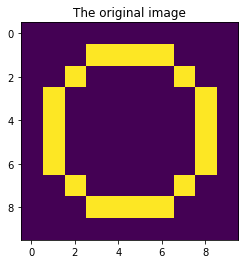

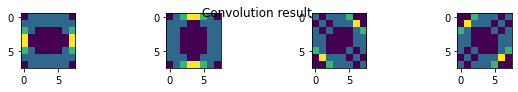

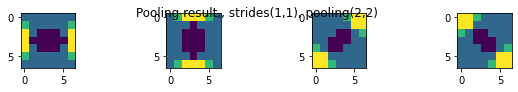

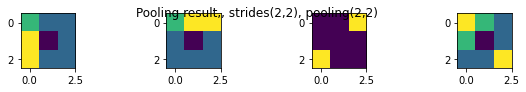

In [56]:
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   #                kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out

#--
class Pool:
    def __init__(self, pool_size, strides): # 스트라이드 추가
        self.pool_size = pool_size
        self.strides = strides
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        s_h, s_w = self.strides 
        out = np.zeros(((X.shape[0]-k_h)//s_h+1, (X.shape[1]-k_w)//s_w+1)) # 앞에서 추가한 스트라이드랑 비슷한 개념임
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w])
        return out

#--
local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

#--
local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
strides = (1,1)
pool1 = Pool(pool_size, strides)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2
pool_size = (3,3)
strides = (2,2)
pool2 = Pool((3,3), (2,2))
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]

#--
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

#
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result,, strides(1,1), pooling(2,2)', fontsize=12)
plt.show()

plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result,, strides(2,2), pooling(2,2)', fontsize=12)
plt.show()

### 21.3.7 padding(풀링층)

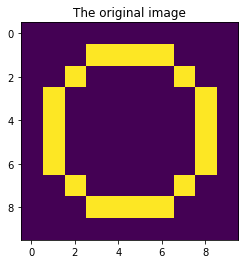

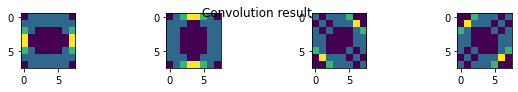

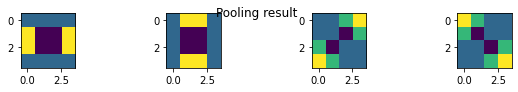

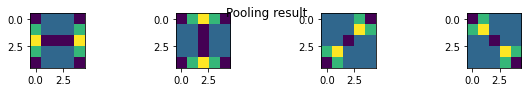

In [57]:
class Conv:
    def __init__(self, W, filters, kernel_size):
        self.filters = filters
        self.kernel_size = kernel_size
        self.W = W # np.random.rand(filters, kernel_size[0], 
                   #                         kernel_size[1])
    def f_prop(self, X):
        k_h, k_w = self.kernel_size
        out = np.zeros((filters, X.shape[0]-k_h+1, X.shape[1]-k_w+1))
        for k in range(self.filters):
            for i in range(out[0].shape[0]):
                for j in range(out[0].shape[1]):
                    x = X[i:i+k_h, j:j+k_w]
                    out[k,i,j] = np.dot(self.W[k].flatten(), x.flatten())
        return out


#
class Pool:
    def __init__(self, pool_size, strides, padding):
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def f_prop(self, X):
        k_h, k_w = self.pool_size
        s_h, s_w = self.strides
        p_h, p_w = self.padding
        out = np.zeros(((X.shape[0]+p_h*2-k_h)//s_h+1, 
                        (X.shape[1]+p_w*2-k_w)//s_w+1))
        X = np.pad(X, ((p_h,p_h),(p_w,p_w)), 'constant', # 여기부분이 흠...
                   constant_values=((0,0),(0,0)))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i,j] = np.max(X[i*s_h:i*s_h+k_h, j*s_w:j*s_w+k_w])
        return out

local_filename, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy') 
X = np.load(local_filename)

local_filename_w, headers = urllib.request.urlretrieve('https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/weight.npy') 
W = np.load(local_filename_w)

# 합성곱
filters = 4
kernel_size = (3,3)
conv = Conv(W=W, filters=filters, kernel_size=kernel_size)
C = conv.f_prop(X)

# 풀링 1
pool_size = (2,2)
strides = (2,2)
padding = (0,0)
pool1 = Pool(pool_size=pool_size, strides=strides, padding=padding)
P1 = [pool1.f_prop(C[i]) for i in range(len(C))]

# 풀링 2
pool_size = (2,2)
strides = (2,2)
padding = (1,1)
pool2 = Pool(pool_size=pool_size, strides=strides, padding=padding)
P2 = [pool2.f_prop(C[i]) for i in range(len(C))]

#--
plt.imshow(X)
plt.title('The original image', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(C[i])
plt.suptitle('Convolution result', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P1[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()

#--
plt.figure(figsize=(10,1))
for i in range(filters):
    plt.subplot(1, filters, i+1)
    ax = plt.gca() # get current axis
    ax.tick_params(labelbottom="off", labelleft="off", bottom="off", left="off") # 축을 삭제합니다
    plt.imshow(P2[i])
plt.suptitle('Pooling result', fontsize=12)
plt.show()